## Zusatzaufgabe: Aufgabe 1

Implementieren Sie die folgenden zwei  Generatoren für (pseudo)zufällige Zahlen: 

1. <a title="Multiply-with-carry" href="https://de.wikipedia.org/wiki/Kongruenzgenerator" target="_blank">linearer Kongruenzgenerator</a> (setzen Sie $a=2$, $b=1$ und $m=100$) und

2. <a title="Multiply-with-carry" href="https://de.wikipedia.org/wiki/Multiply-with-carry" target="_blank">Multiply-with-carry</a>  (setzen Sie $a=2$ und $b=100$).

Schreiben Sie die Funktionen so, dass Sie den initialen Seed und die obere Grenze für die Zufallszahlen als Variablen mit übergeben können. Die Zahlen sollen im Intervall $[0,100]$ erzeugt werden.

Überprüfen Sie die Funktionsfähigkeit Ihrer Berechnung bzw. der Qualität der Zufallszahlen durch folgende Schritte:

1. Berechnen Sie $N$-Mal 100 Zufallszahlen mit beiden Algorithmen mit jeweils unterschiedlichen Seed (Abhängig von $N < 100$)
2. Bestimmen Sie den <a href="https://de.wikipedia.org/wiki/Korrelationskoeffizient">Korrelationskoeffizient</a> für alle Kombinationen der in 1. ausgerechneten Zufallszahlen. 



In [1]:
reset()

In [2]:
def linearkong(seed):
    a = 2.
    b = 1
    m = 100
    zufall = seed
    while True:
        zufall = (a*zufall + b) % m
        yield zufall

        
def mwc(x,c):
    m = 100
    a = 2.
    # m = a*b -1 isprime
    while True:
        xn = (a*x +c) % m
        cn = floor((a*x + c) /m)
        x = xn
        c = cn
        yield xn
    
def covm(zzahlen):
    N = len(zzahlen)
    covm = matrix(RR,N,N)
    for i, xi in enumerate(zzahlen):
        n = len(xi)
        for j, xj in enumerate(zzahlen):             
            covm[i,j] = mean( ( (matrix(xi)-ones_matrix(1,n)*mean(xi)).elementwise_product(
                    matrix(xj) - ones_matrix(1,n)*mean(xj))).list() )/(std(xi)*std(xj))
    return covm
        
    
N = 15
        
zzahlen_mwc = []
zzahlen_lin = []

for n in range(1,N):
    d = []
    for idx, x in enumerate(linearkong(n)):
        if idx> 100: 
            break
        d.append(x)
    zzahlen_lin.append(d)

    d = []
    for idx, x in enumerate(mwc(n,2)):
        if idx> 100: 
            break
        d.append(x)
    zzahlen_mwc.append(d)

#zzahlen_lin = [ [ linearkong(n) for x in range(100) ] for n in range(1,N)]
#zzahlen_mwc = [ [ mwc(n,2) for x in range(100) ] for n in range(1,N)]

print (covm(zzahlen_lin))
print (covm(zzahlen_mwc))

[   0.990099009900990    0.188812510162835   -0.235253506478609 0.000427584311206487    0.471591334500215   -0.187702345073318    0.189034343267333    0.471372225387949    0.216464320001310  0.00102396336039066   -0.186819165972742    0.189034478979461  0.00130094104127656   -0.213803083690774]
[   0.188812510162835    0.990099009900990 0.000559839240446988 0.000641300896064825   -0.234648733068654    0.189311825504472   -0.187148045769736    0.471735923550433   -0.214304309824958    0.236554204548210    0.189587947971694   -0.185990613750700   -0.232655181637115    0.216971784965941]
[  -0.235253506478609 0.000559839240446988    0.990099009900990   -0.215014104245429    0.189478377395133   -0.469449463858916   -0.233803294136775   -0.186483574497658  0.00170732246868929    0.190031095426050    0.471938475851893   -0.467014622749382   -0.185052993775746  0.00255469289593257]
[0.000427584311206487 0.000641300896064825   -0.215014104245429    0.990099009900990    0.217049189176854  0.001

In [3]:
a = matrix([1,1,1]) - ones_matrix(1,3)*4
a.list()

[-3, -3, -3]

In [4]:
show(ones_matrix(3,1))

[1]
[1]
[1]

## Aufgabe 2
Schreiben Sie eine Funktion, die zu einer gegebenen Menge (Liste) von Zahlen die Summe aller Elemente berechnet und zur&uuml;ckgibt (Die Befehle <em>sum</em> und <em>add</em> d&uuml;rfen nicht benutzt werden)  

*Hinweis*: Zwei Möglichkeiten, das zu tun, sind die normale Schleife oder reduce().

In [5]:
reset()
def summe(M):
    s = 0
    for x in M:
        s += x
    return s

In [6]:
summe([1..100])

5050

In [7]:
reduce (lambda acc,x: acc + x, [1..100],0)

5050

## Aufgabe 3
Schreiben Sie eine Funktion inklusive Hilfetext und Kommentierungen, die f&uuml;r eine gegebene mathematische Funktion (als Ausdruck) die lokalen Extrema samt Funktionswerten und Maxima/Minima-Bestimmung ausrechnet und eine Liste von Dictionaries zur&uuml;ckgibt, die jeweils den Extremwert und seine Eigenschaft enthalten.</span>  

In [8]:
def kurvendiskussion(f):
    """ Macht eine Kurvendiskussion zum gegebenen Ausdruck.
    
    INPUT:
    
    - ``f`` -- Ausdruck 
    
    OUTPUT: 
    
    - Dictionary der lokalen Extrema, seines Wertes und des Typs (Maxima/Minima)
    """
    out = [] # Ausgabe Liste
    deriv1 = f.diff(x) # Erste Ableitung
    deriv2 = deriv1.diff(x) # Zweite Ableitung
    extrema = solve(deriv1 == 0, x,solution_dict=True) # Extrempunkte finden
    for sol in extrema:
        out.append({})
        out[len(out)-1]['x'] = float(sol[x])
        out[len(out)-1]['y'] = float(f(sol[x]))
        if deriv2(sol[x]) < 0:
            out[len(out)-1]['type'] = 'Maximum'
        else:
            out[len(out)-1]['type'] = 'Minimum'  
    return out

In [9]:
kurvendiskussion?

In [10]:
f(x) = (2*x^2 - 3*x)/(x - 4)
kurvendiskussion(f)

[{'type': 'Maximum', 'x': 0.8377223398316205, 'y': 0.3508893593264831},
 {'type': 'Minimum', 'x': 7.16227766016838, 'y': 25.64911064067353}]

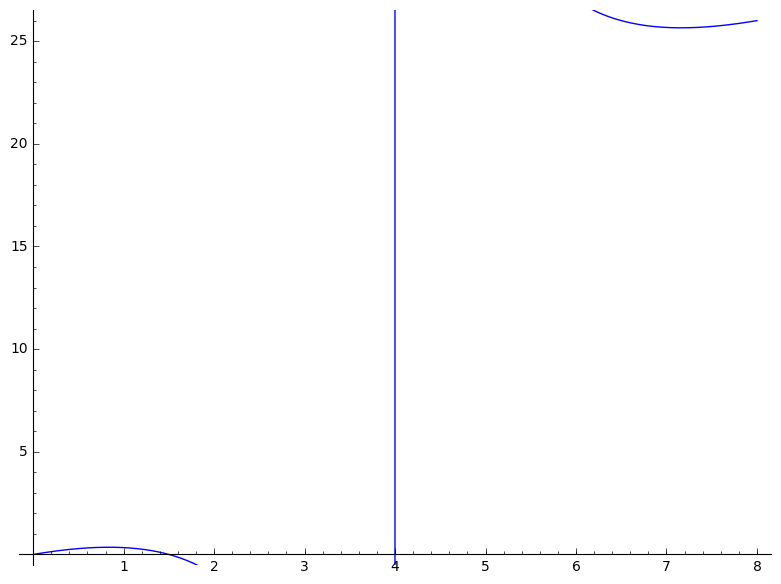

In [11]:
plot(f,xmin=0,xmax=8,ymin=0,ymax=26)

## Aufgabe 4
Schreiben Sie eine Funktion <strong>fak</strong>, die die Fakult&auml;t $$n! = \prod_{i=1}^n i$$ einer nat&uuml;rlichen Zahl $n$ berechnet. Schreiben Sie 2 Varianten dieser Funktion, bei der die eine rekursiv vorgeht. Anmerkung: ```factorial()``` darf nicht benutzt werden.

In [1]:
reset()
#Rekursiv
def fak(n):
    if n==0:
        return 1
    else:
        return n*fak(n-1)

In [2]:
fak(5)

120

In [3]:
fak(1000)

RuntimeError: maximum recursion depth exceeded while calling a Python object

In [4]:
#Direkt, iterativ
def fak2(n):
    x = 1
    for k in [1..n]:
        x = x * k
    return x

In [5]:
fak2(5)

120

In [6]:
fak2(1000)

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

In [7]:
def fak3(n):
    return prod([1..n])

In [8]:
fak3(5)

120

## Aufgabe 5
Schreiben Sie eine Prozedur (Funktion), die als Eingabeparameter eine Liste mit beliebigen Eintr&auml;gen hat. Die Prozedur soll daraus ein Dictionary erstellen und zur&uuml;ckgeben, das die verschiedenen Elemente der Liste (als Indizes) versehen mit ihrer H&auml;ufigkeit (als Werte) enth&auml;lt.  

In [9]:
# 1. Möglichkeit
def f(l):
    ret = {}
    # Set(l) zum Entfernen doppelter Elemente
    for x in Set(l):
        ret[x] = len([s for s in l if s==x])
    return ret
f([1,1,2,3,2,4,3,3,1])

{1: 3, 2: 2, 3: 3, 4: 1}

In [10]:
# 2. Möglichkeit
def f(l):
    ret = {}
    for x in l:
        if x in ret:
            ret[x] = ret[x] + 1
        else:
            ret[x] = 1
    return ret
f([1,1,2,3,2,4,3,3,'auto'])

{1: 2, 2: 2, 3: 3, 4: 1, 'auto': 1}

In [11]:
# 3. Möglichkeit
def f(l): return {i :  len(filter(lambda x : x == i,l)) for i in l}
f([1,1,2,3,2,4,3,3,1])

{1: 3, 2: 2, 3: 3, 4: 1}

## Aufgabe 6
Schreiben Sie eine Prozedur, die zu einem gegebenen Startwert $x_0$ und einer gegebenen Funktion $f$ die ersten 20 Iterationen $$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_{k})}, \quad k=0,1,\dots ,19 $$ berechnet. 

Wenden Sie die Prozedur auf $f(x)=\exp(-x)-x$ und $g(x)=x^3-2x+3$ an. Verwenden Sie jeweils $x_0=0$ und pr&uuml;fen Sie, ob $x_{20}$ eine gute Approximation einer Nullstelle von $f$ ist. 

In [12]:
reset()

In [13]:
def newton(f, x0, n):
    x = [x0.n()]
    df = f.diff()
    for k in [0..n-1]:
        x.append(x[k] - f(x[k])/df(x[k]))
    return x

In [14]:
f(x) = exp(-x)-x
n = newton(f, 0, 20); n

[0.000000000000000,
 0.500000000000000,
 0.566311003197218,
 0.567143165034862,
 0.567143290409781,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784,
 0.567143290409784]

In [15]:
map(f, n)

[1.00000000000000,
 0.106530659712633,
 0.00130450980602004,
 1.96480471781335e-7,
 4.44089209850063e-15,
 -1.11022302462516e-16,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000]

In [16]:
g(x) = x^3 - 2*x + 3
n = newton(g, 0, 20); n

[0.000000000000000,
 1.50000000000000,
 0.789473684210526,
 15.4837625979843,
 10.3471096468676,
 6.93189687901041,
 4.66517856298333,
 3.16099837457084,
 2.15075075586611,
 1.42269211389378,
 0.677578739255802,
 3.81881803775170,
 2.59598052875135,
 1.75597611228197,
 1.07980023875699,
 -0.321765089204948,
 1.81521452010055,
 1.13662200576444,
 -0.0336798562672780,
 1.50259486794424,
 0.792959307842985]

In [17]:
map(g, n)

[3.00000000000000,
 3.37500000000000,
 1.91310686689022,
 3684.21662289513,
 1090.09504951794,
 322.222130328704,
 95.2020807287257,
 28.2624168084041,
 8.64728823110586,
 3.03421980134267,
 1.95592769389672,
 51.0536049351273,
 15.3026500185986,
 4.90251601852657,
 2.09941264722727,
 3.61021694658862,
 5.35070961781621,
 2.19516885108984,
 3.06732150837165,
 3.38735594023566,
 1.91268187758649]

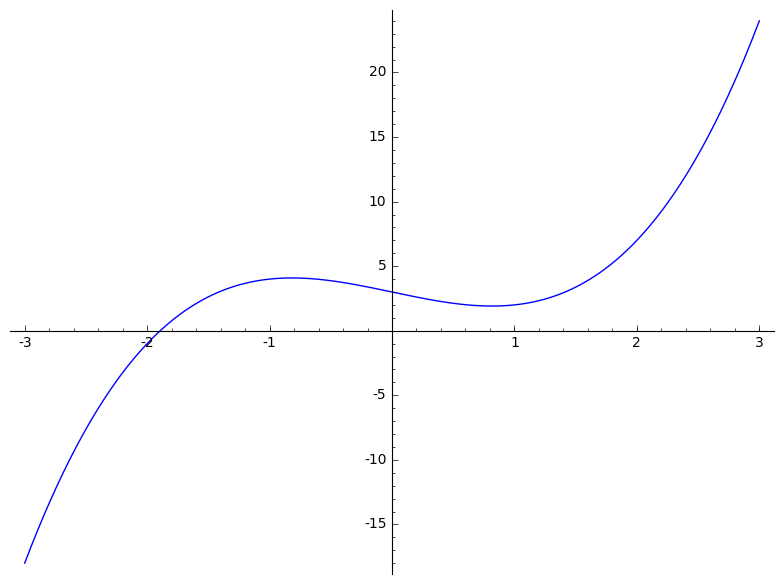

In [18]:
plot(g(x), x,-3,3)

In [19]:
newton(g, -4, 20)

[-4.00000000000000,
 -2.84782608695652,
 -2.20293934427889,
 -1.94138162935686,
 -1.89472462010931,
 -1.89329053142704,
 -1.89328919630565,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450,
 -1.89328919630450]

In [20]:
#rekursive Definition, gibt nur n=20 aus, aber keine Zwischenschritte
def newton_rekursiv(f, x0, n):
    if n==0:
        return x0.n()
    else:
        y = newton_rekursiv(f, x0, n-1)
        return y - f(y)/f.diff()(y)

In [21]:
f(x) = exp(-x)-x
n = newton_rekursiv(f, 0, 20); n

0.567143290409784

In [22]:
solve(exp(-x)-x==0,x) # Sage kann das nicht lösen..

[x == e^(-x)]

In [23]:
(exp(-x)-x).find_root(0,1) # numerisch gehts aber

0.5671432904097838

## Aufgabe 7
a) Pr&uuml;fen Sie folgende Funktionen auf Differenzierbarkeit (nehmen Sie an, dass die Teilfunktionen analytisch sind):  
$$f(x) = \left\{\begin{array}{ll} \sqrt{x}, & x\geq1 \\ x^3+2.5x-2, & x<1 \end{array}\right.,$$ $$g(x) = \left\{\begin{array}{ll} x^2, & x\geq0 \\ -x, & x<0 \end{array}\right..$$ 

b) Schreiben Sie eine Funktion, die a) f&uuml;r eine gegebene Funktion ausf&uuml;hrt und per print ausgibt, ob es differenzierbar ist oder nicht und weiterhin True (diffbar) oder False (nicht diffbar) zur&uuml;ckgibt. Nehmen Sie an, dass die &uuml;bergebene Funktion mit <em>piecewise()</em> erzeugt wurde und dass diese genau 2 Intervalle beinhaltet. Pr&uuml;fen Sie die korrekte Funktionsweise der Funktion anhand der beiden Funktionen aus a).  

In [1]:
reset()
var('x')

x

In [25]:
limit(sqrt(x), x=1, dir='plus'), limit(x^3+2.5*x-2, x=1, dir='minus')

(1, 1.5)

In [26]:
limit(x^2, x=0, dir='plus'), limit(-x, x=0, dir='minus')

(0, 0)

In [27]:
limit(diff(x^2,x), x=0, dir='plus'), limit(diff(-x,x), x=0, dir='minus')

(0, -1)

In [2]:
def diffbar(f):
    # Gemeinsamen Definitionsbereich herausfinden (Annahme: sie ueberschneiden sich nicht, beruehren sich nur) :
    schnittpunkt = [domain1.sup() for domain1, function1 in f.items() for domain2, function2 in f.items() if domain1.sup() == domain2.inf()]
    functions = [function for d, function in f.items()]
    if functions[0].limit(x=schnittpunkt[0]) == functions[1].limit(x=schnittpunkt[0]):
        #Funktion ist stetig
        if functions[0].diff().limit(x=schnittpunkt[0], dir='-') == functions[1].diff().limit(x=schnittpunkt[0], dir='+'):
            print "Die Funktion ist diffbar"
            return True
        else:
            print "Stetig, aber nicht diffbar an x={}".format(schnittpunkt[0])
            return False
    else:
        print "Die Funktion ist nicht diffbar an x={}".format(schnittpunkt[0])
        return False

In [3]:
g = piecewise([[(-oo,0),x^2],[(0,oo),x]]); g.pieces()

(piecewise(x|-->x^2 on (-oo, 0); x), piecewise(x|-->x on (0, +oo); x))

In [4]:
diffbar(g)

Stetig, aber nicht diffbar an x=0


False

In [5]:
f = piecewise([[(-oo,1),sqrt(x)],[(1,oo),x^3+2.5*x-2]])

In [6]:
diffbar(f)

Die Funktion ist nicht diffbar an x=1


False

In [3]:
1/0

ZeroDivisionError: rational division by zero